# Neural Networks Architectures

CSI 4106 - Fall 2025

Marcel Turcotte  
Version: Jul 10, 2025 16:56

# Preamble

## Quote of the Day

[Yann LeCun](https://x.com/ylecun), recognized as one of the three
pioneers of deep learning and the inventor of Convolutional Neural
Networks (CNNs), frequently engages in discussions with [Elon
Musk](https://x.com/elonmusk) on the social media platform X (previously
known as Twitter).

## Learning objectives

-   **Explain** the Hierarchy of Concepts in Deep Learning
-   **Compare** Deep and Shallow Neural Networks
-   **Describe** the Structure and Function of Convolutional Neural
    Networks (CNNs)
-   **Understand** Convolution Operations Using Kernels
-   **Explain** Receptive Fields, Padding, and Stride in CNNs
-   **Discusss** the Role and Benefits of Pooling Layer

Today, we have a particularly dense agenda. The study of convolutional
networks involves multiple levels of complexity. Please feel free to ask
questions if you need clarification.

Detailed learning objectives.

1.  **Explain the Hierarchy of Concepts in Deep Learning**
    -   Understand how deep learning models build hierarchical
        representations of data.
    -   Recognize how this hierarchy reduces the need for manual feature
        engineering.
2.  **Compare Deep and Shallow Neural Networks**
    -   Discuss why deep networks are more parameter-efficient than
        shallow networks.
    -   Explain the benefits of depth in neural network architectures.
3.  **Describe the Structure and Function of Convolutional Neural
    Networks (CNNs)**
    -   Understand how CNNs detect local patterns in data.
    -   Explain how convolutional layers reduce the number of parameters
        through weight sharing.
4.  **Understand Convolution Operations Using Kernels**
    -   Describe how kernels (filters) are applied over input data to
        perform convolutions.
    -   Explain how feature maps are generated from convolution
        operations.
5.  **Explain Receptive Fields, Padding, and Stride in CNNs**
    -   Define the concept of a receptive field in convolutional layers.
    -   Understand how padding and stride affect the output dimensions
        and computation.
6.  **Discuss the Role and Benefits of Pooling Layers**
    -   Explain how pooling layers reduce spatial dimensions and control
        overfitting.
    -   Describe how pooling introduces translation invariance in CNNs.

# Introduction

## Hierarchy of concepts

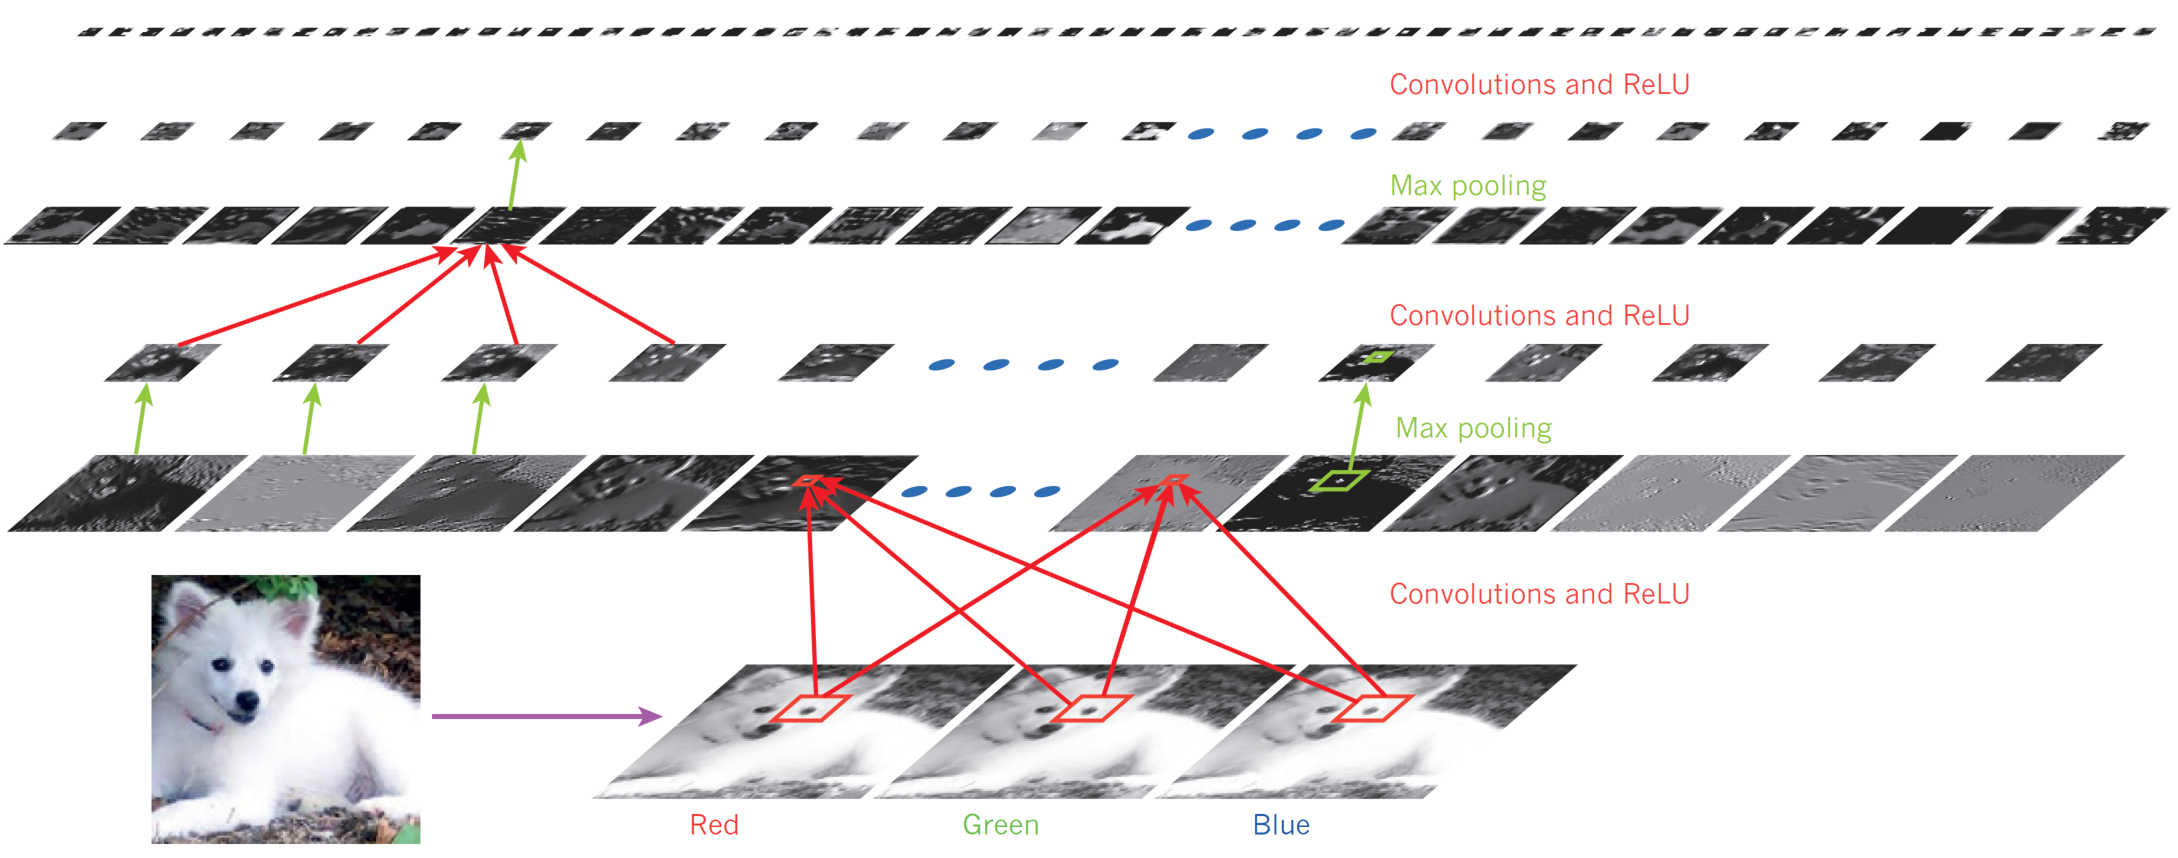

**Attribution**: LeCun, Bengio, and Hinton (2015)

In the book “Deep Learning” (Goodfellow, Bengio, and Courville 2016),
authors Goodfellow, Bengio, and Courville define deep learning as a
subset of machine learning that enables computers to “understand the
world in terms of a hierarchy of concepts.”

This hierarchical approach is one of deep learning’s most significant
contributions. It reduces the need for manual feature engineering and
redirects the focus toward the engineering of neural network
architectures.

Convolutional Neural Networks (CNNs) have had a profound impact on the
field of machine learning, particularly in areas involving image and
video processing.

1.  **Revolutionizing Image Recognition**: CNNs have significantly
    advanced the state of the art in image recognition and
    classification, achieving high accuracy across various datasets.
    This has led to breakthroughs in fields such as medical imaging,
    autonomous vehicles, and facial recognition.

2.  **Feature Extraction**: CNNs automatically learn to extract features
    from raw data, eliminating the need for manual feature engineering.
    This capability has been crucial in handling complex data patterns
    and has expanded the applicability of machine learning to diverse
    domains.

3.  **Transfer Learning**: CNNs facilitate transfer learning, where
    pre-trained networks on large datasets can be fine-tuned for
    specific tasks with limited data. This has made CNNs accessible and
    effective for a wide range of applications beyond their original
    training scope.

4.  **Advancements in Deep Learning**: The success of CNNs has spurred
    further research in deep learning architectures, inspiring the
    development of more sophisticated models like recurrent neural
    networks (RNNs), long short-term memory networks (LSTMs), and
    transformer models.

5.  **Broader Application Areas**: Beyond image processing, CNNs have
    been adapted for natural language processing, audio processing, and
    even in bioinformatics for tasks such as protein structure
    prediction and genomics.

6.  **Implications for Real-World Applications**: CNNs have enabled
    practical applications in fields such as healthcare, where they
    assist in diagnostic imaging, and in security, where they enhance
    surveillance systems. They have also contributed to advancements in
    virtual reality, gaming, and augmented reality.

## Hierarchy of concepts

-   Each layer detects **patterns** from the output of the **layer
    preceding it**.
    -   In other words, proceeding from the input to the output of the
        network, the network uncovers “**patterns of patterns**”.
        -   Analyzing an image, the networks first detect simple
            patterns, such as **vertical**, **horizontal**, **diagonal**
            lines, **arcs**, etc.
        -   These are then combined to form **corners**, **crosses**,
            etc.
-   (This explains how **transfer learning** works and why selecting the
    bottom layers only.)

## But also …

> “An MLP with just **one hidden layer** can theoretically model even
> the most **complex functions**, provided it **has enough neurons**.
> But for complex problems, **deep networks** have a much **higher
> parameter efficiency** than shallow ones: they can model complex
> functions **using exponentially fewer neurons** than shallow nets,
> allowing them to reach much **better performance** with the same
> amount of training data.”

Géron (2019) § 10

During the lecture, attempt to discern why convolutional neural networks
possess fewer parameters compared to fully connected feedforward
networks.

## How many layers?

-   Start with one layer, then **increase the number of layers** until
    the model starts **overfitting** the training data.
-   **Finetune** the model adding regularization (dropout layers,
    regularization terms, etc.).

The number of neurons and other hyperparameters are determined using a
grid search.

## Observation

Consider a **feed-forward network** (FFN) and its model:

$$
  h_{W,b}(X) = \phi_k(\ldots \phi_2(\phi_1(X)) \ldots)
$$

where

$$
  \phi_l(Z) = \sigma(W_l Z + b_l)
$$

for $l=1 \ldots k$. - The **number of parameters** in grows rapidly:

$$
  (\text{size of layer}_{l-1} + 1) \times \text{size of layer}_{l}
$$

**Two layers** **1,000-unit** implies **1,000,000** parameters!

# Convolutional Neural Network

## Convolutional Neural Network (CNN)

<https://www.youtube.com/watch?v=QzY57FaENXg>

An excellent high-level overview of CNNs.

## Convolutional Neural Network (CNN)

-   Crucial pattern information is often **local**.

    -   e.g., edges, corners, crosses.

-   **Convolutional layers** reduce parameters significantly.

    -   Unlike dense layers, neurons in a convolutional layer are **not
        fully connected** to the preceding layer.

    -   Neurons connect only within their **receptive fields**
        (rectangular regions).

**Convolutional networks** originate from the domain of **machine
vision**, which explains their intrinsic compatibility with
**grid-structured inputs**.

The original publication by Yann Lecun has been cited nearly 35,000
times (Lecun et al. 1998).

# Kernel

## Kernel

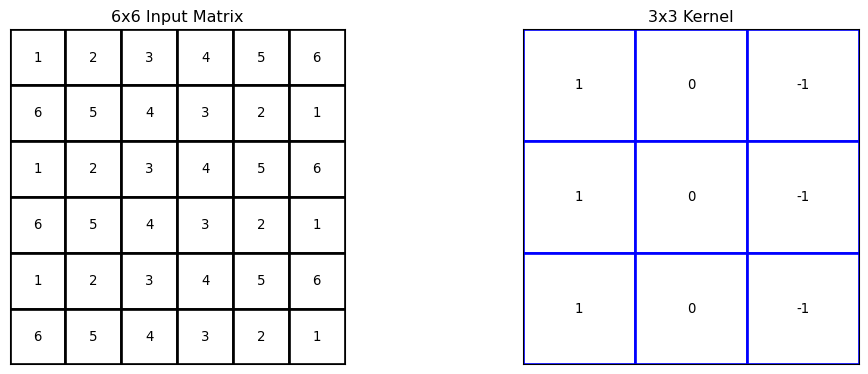

A **kernel** is a small matrix, usually $3 \times 3$, $5 \times 5$, or
similar in size, that slides over the input data (such as an image) to
perform convolution.

## Kernel

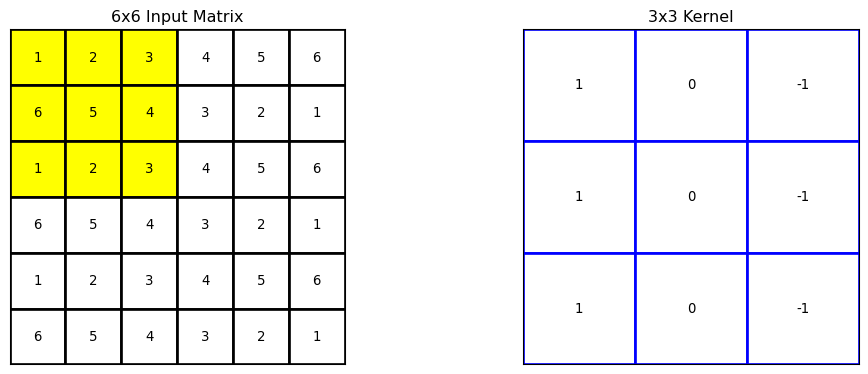

Beginning with the kernel positioned to overlap the upper-left corner of
the input matrix.

## Kernel

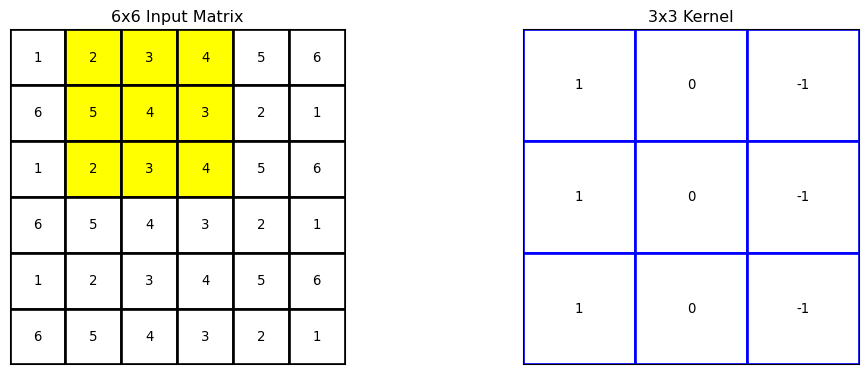

It can be moved to the right three times.

## Kernel

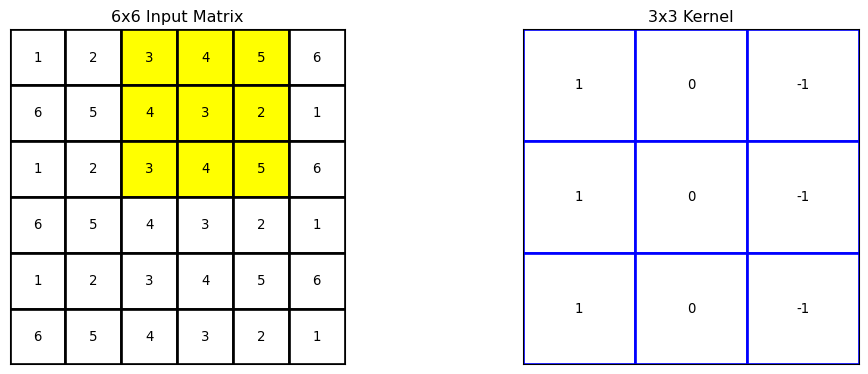

## Kernel

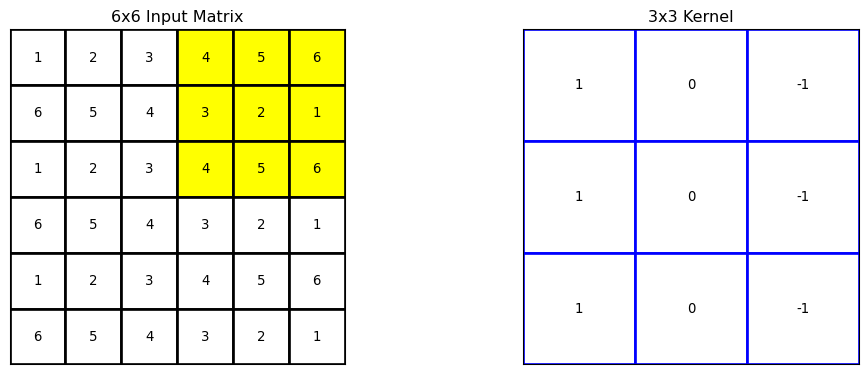

## Kernel

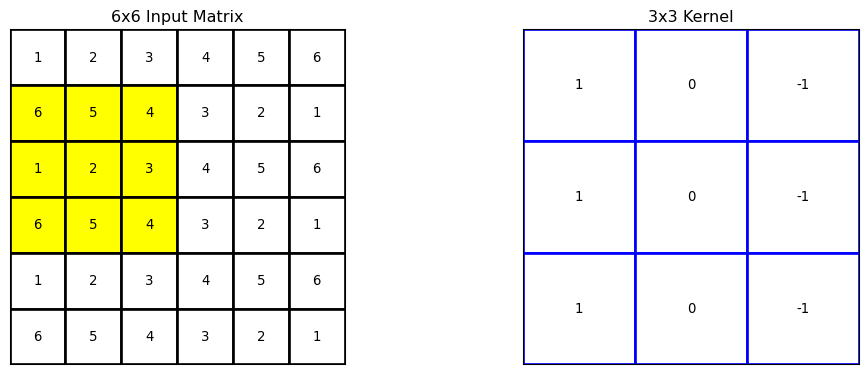

The kernel can then be moved to the second row of the input matrix, and
moved to the right three times.

How many placements of the kernel over the input matrix are there?
$4 \times 4 = 16$.

## Kernel Placements

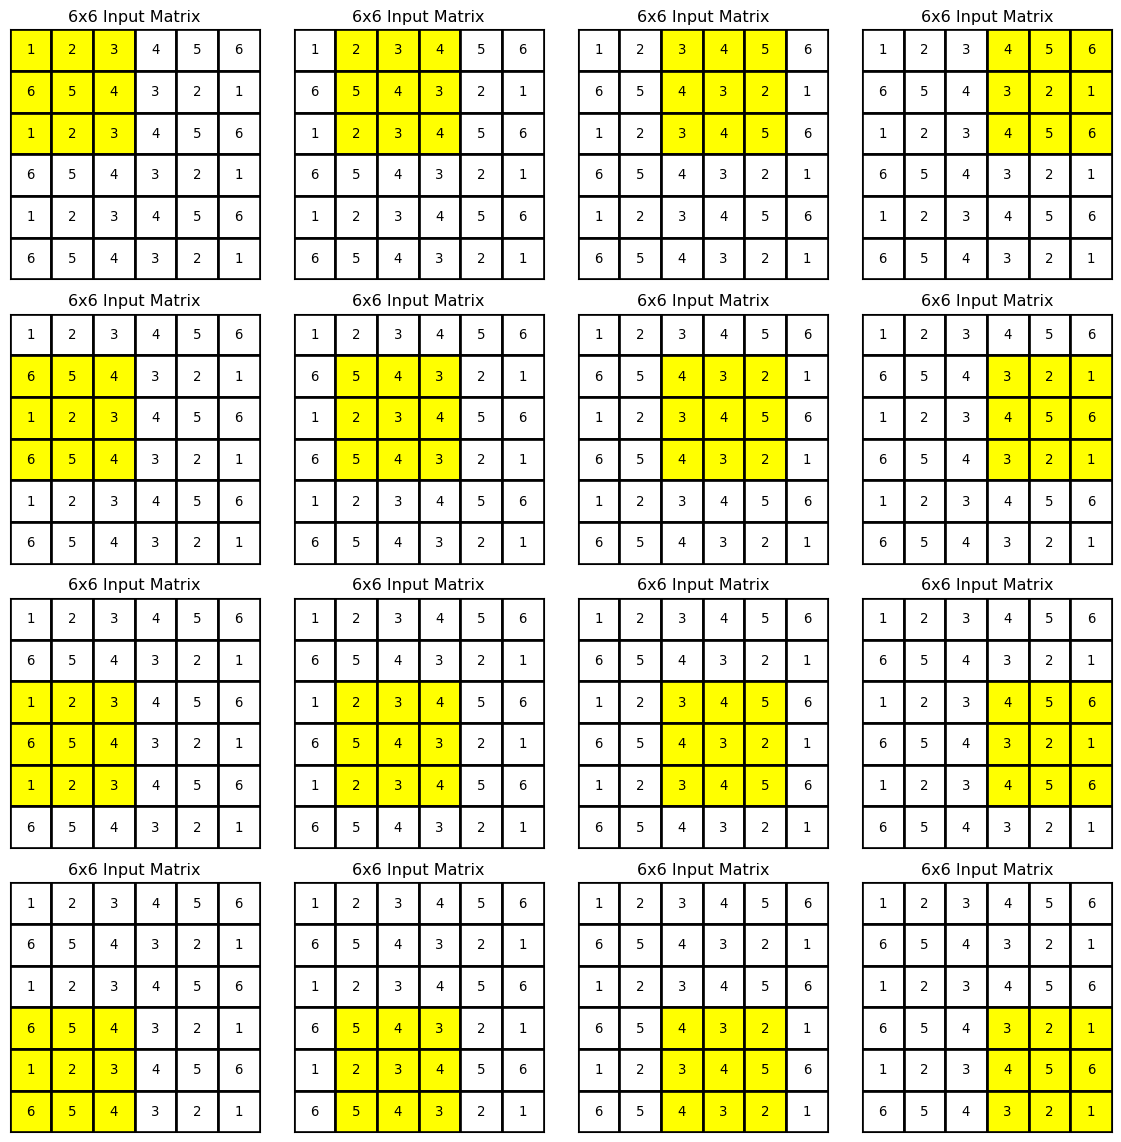

## Kernel

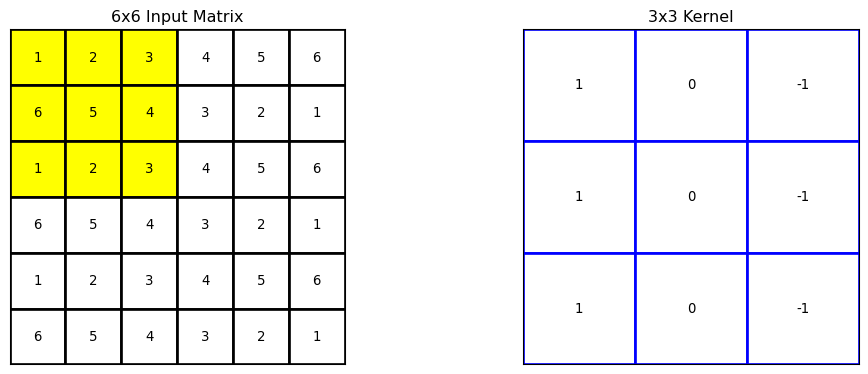

With the kernel placed over a specific region of the input matrix, the
**convolution** is **element-wise multiplication** (each element of the
kernel is multiplied by the corresponding element of the input matrix
region it overlaps) followed by a **summation** of the results to
produce a **single scalar value**.

## Kernel

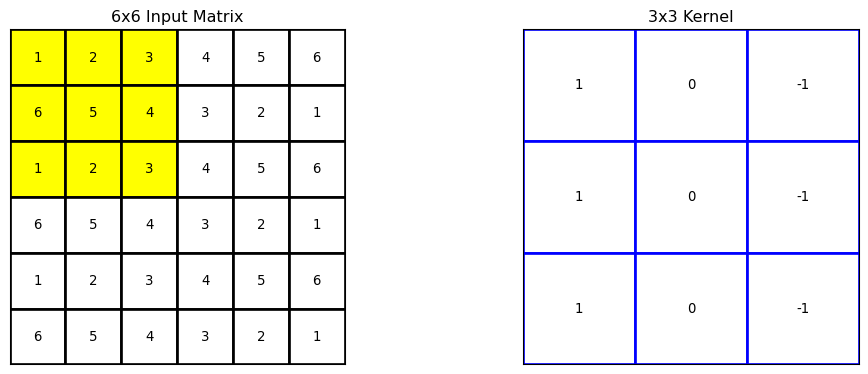

$1 \times 1 + 2 \times 0 + 3 \times (-1) + 6 \times 1 + 5 \times 0 + 4 \times (-1) + 1 \times 1 + 2 \times 0 + 3 \times (-1) = -2$

## Kernel

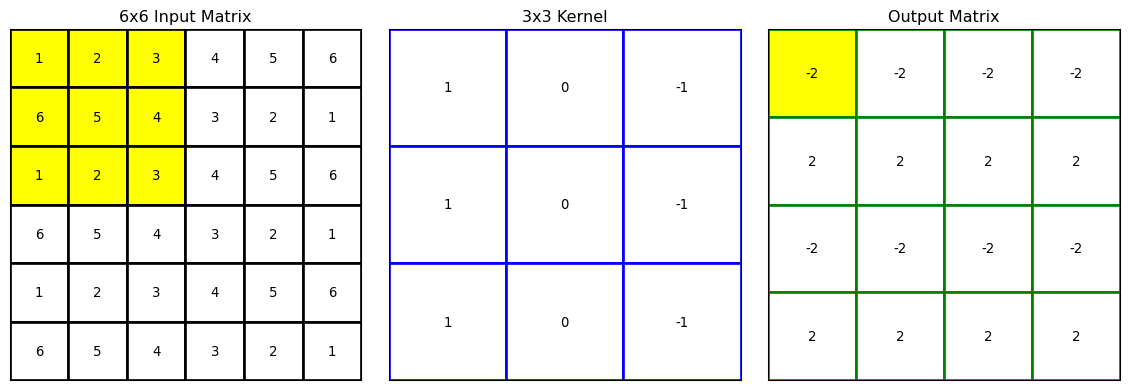

The 16 resulting values can be organized into an **output matrix**. The
element at position (0,0) in this output matrix represents the result of
applying the convolution operation with the kernel at the initial
position on the input matrix. In convolutional neural networks, the
output matrix is referred to as a **feature map**.

It is referred to as a feature map because these outputs serve as
features for the subsequent layer. In CNNs, the term “feature map”
refers to the output of a convolutional layer after applying filters to
the input data. These feature maps capture various patterns or features
from the input, such as edges or textures in image data.

The output feature maps of one layer become the input for the next
layer, effectively serving as features that the subsequent layer can use
to learn more complex patterns. This hierarchical feature extraction
process is a key characteristic of CNNs, allowing them to build
progressively more abstract and high-level representations of the input
data as the network depth increases.

## Blurring

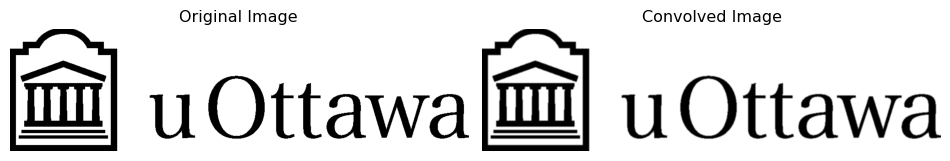

In [12]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

def apply_kernel_to_image(image_path, kernel):
    # Load the image and convert it to grayscale
    image = Image.open(image_path).convert('L')
    image_array = np.array(image)

    # Apply the convolution using the provided kernel
    convolved_array = convolve(image_array, kernel, mode='reflect')

    # Convert the convolved array back to an image
    convolved_image = Image.fromarray(convolved_array)

    # Display the original and convolved images
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Convolved Image')
    plt.imshow(convolved_image, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Define the 3x3 averaging kernel
kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

# Apply the kernel to the image (provide your image path here)
image_path = '../../assets/images/uottawa_hor_black.png'
apply_kernel_to_image(image_path, kernel)

In [13]:
# Define the 3x3 averaging kernel

kernel = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

A pixel is transformed into the **average of itself and its eight
surrounding neighbors**, resulting in a blurred effect on the image.

The application of kernels to images has been a longstanding practice in
the field of image processing.

## Vertical Edge detection

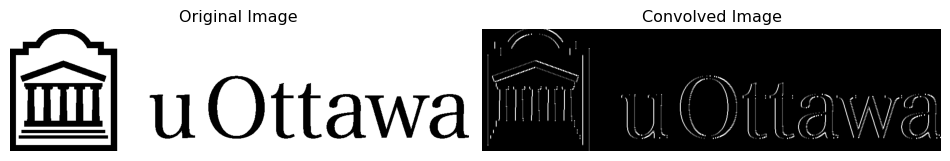

In [15]:
# Define the 3x3 averaging kernel

kernel = np.array([
    [-0.25, 0, 0.25],
    [-0.25, 0, 0.25],
    [-0.25, 0, 0.25]
])

This kernel detects vertical edges by **emphasizing differences in
intensity between adjacent columns**. It subtracts pixel values on the
left from those on the right, enhancing vertical transitions and
suppressing uniform regions.

## Horizontal Edge detection

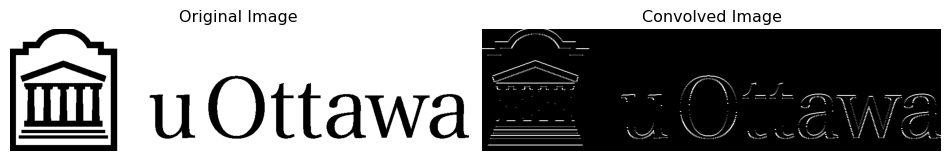

In [17]:
# Define the 3x3 averaging kernel

kernel = np.array([
    [-0.25, -0.25, -0.25],
    [0, 0, 0],
    [0.25, 0.25, 0.25]
])

This kernel detects horizontal edges by **highlighting differences in
intensity between adjacent rows**. It subtracts pixel values in the
upper row from those in the lower row, accentuating horizontal
transitions while minimizing uniform areas.

## Convolutions in Image Processing

<https://www.youtube.com/watch?v=8rrHTtUzyZA>

Uses the **[Julia](https://julialang.org)** programming language.

## But what is a convolution?

<https://youtu.be/KuXjwB4LzSA>

**Convolution** extending beyond its application in image processing.

## Kernels

In contrast to image processing, where kernels are manually defined by
the user, in convolutional networks, the kernels are automatically
learned by the network.

To be continued $\ldots$

# Receptive field

## Receptive field

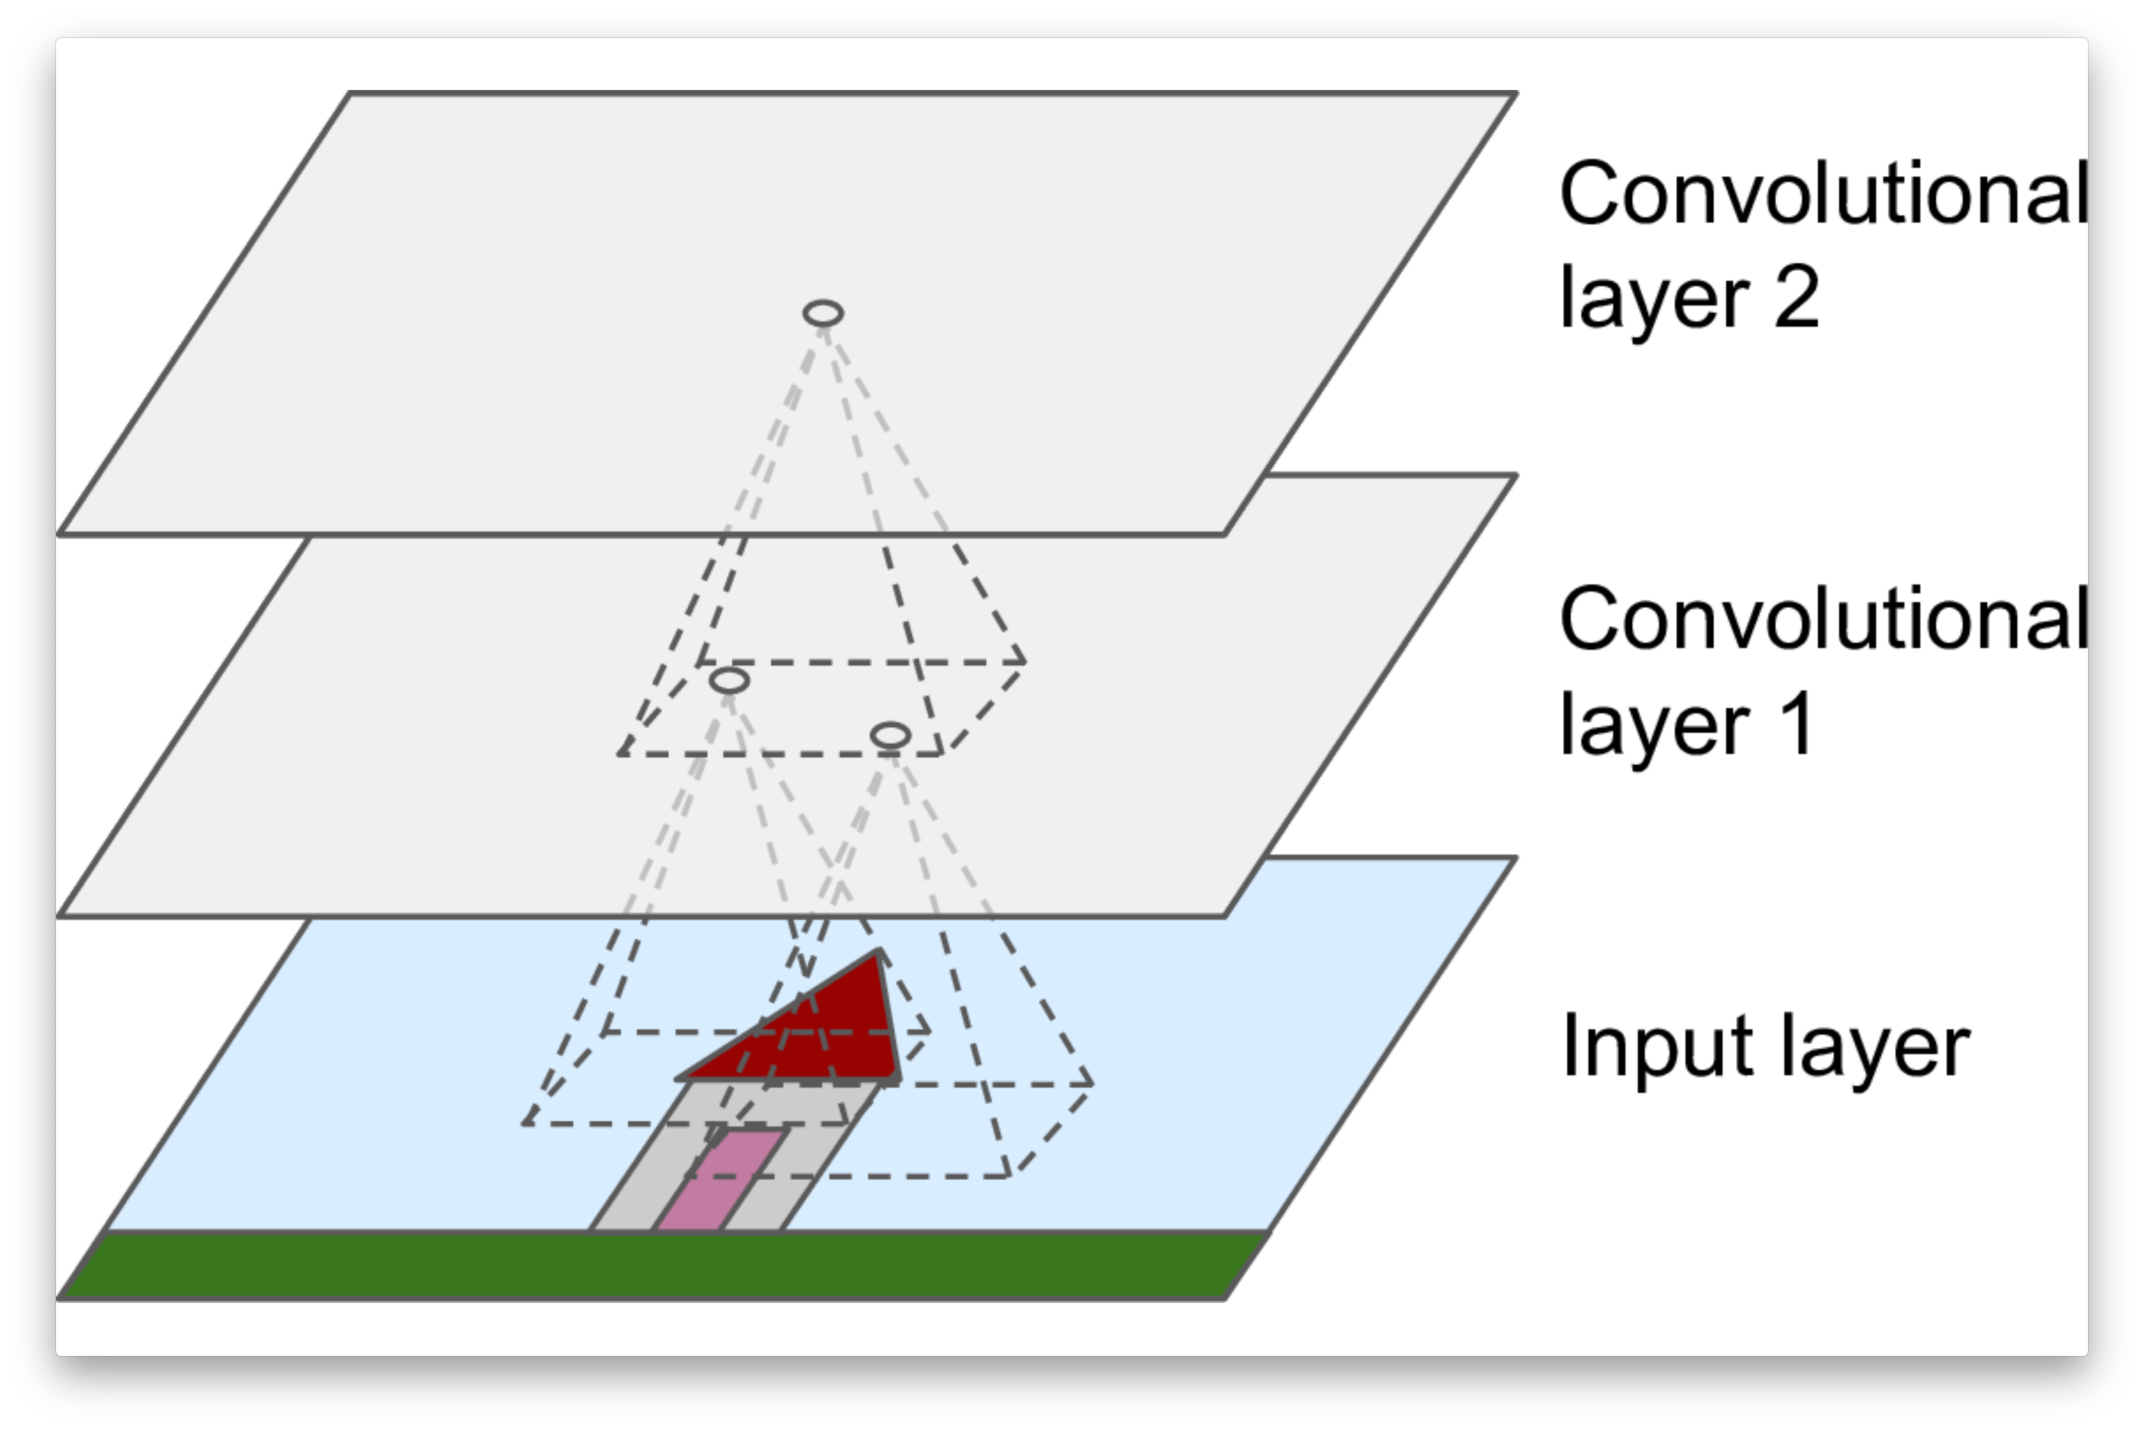

**Attribution**: Géron (2019) Figure 14.2

## Receptive field

-   Each unit is connected to neurons in its **receptive fields**.
    -   Unit $i,j$ in layer $l$ is connected to the units $i$ to
        $i+f_h-1$, $j$ to $j+f_w-1$ of the layer $l-1$, where $f_h$ and
        $f_w$ are respectively the **height** and **width** of the
        **receptive field**.

## Padding

**Zero padding**. In order to have layers of the same size, the grid can
be padded with zeros.

## Padding

No padding

[![](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_no_strides.gif)](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/no_padding_no_strides.gif)

Half padding

[![](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/same_padding_no_strides.gif)](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/same_padding_no_strides.gif)

Full padding

[![](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/full_padding_no_strides.gif)](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/full_padding_no_strides.gif)

**Attribution**:
[github.com/vdumoulin/conv_arithmetic](https://github.com/vdumoulin/conv_arithmetic/)

## Stride

**Stride**. It is possible to connect a larger layer $(l-1)$ to a
smaller one $(l)$ by skipping units. The number of units skipped is
called **stride**, $s_h$ and $s_w$.

. . .

-   Unit $i,j$ in layer $l$ is connected to the units $i \times s_h$ to
    $i \times s_h + f_h - 1$, $j \times s_w$ to $j \times s_w + f_w - 1$
    of the layer $l-1$, where $f_h$ and $f_w$ are respectively the
    **height** and **width** of the **receptive field**, $s_h$ and $s_w$
    are respectively the **height** and **width** **strides**.

## Stride

No padding, strides

[![](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/no_padding_strides.gif)](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/no_padding_strides.gif)

Padding, strides

[![](https://github.com/vdumoulin/conv_arithmetic/raw/master/gif/padding_strides.gif)](https://github.com/vdumoulin/conv_arithmetic/blob/master/gif/padding_strides.gif)

**Attribution**:
[github.com/vdumoulin/conv_arithmetic](https://github.com/vdumoulin/conv_arithmetic/)

# Filters

## Filters

-   A **window** of size $f_h \times f_w$ is moved over the output of
    layers $l-1$, referred to as the **input feature map**, position by
    position.

-   **For each location**, the product is calculated between the
    extracted patch and a matrix of the same size, known as a
    **convolution kernel** or **filter**. The **sum** of the values in
    the resulting matrix constitutes the **output** for that location.

# Model

## Model

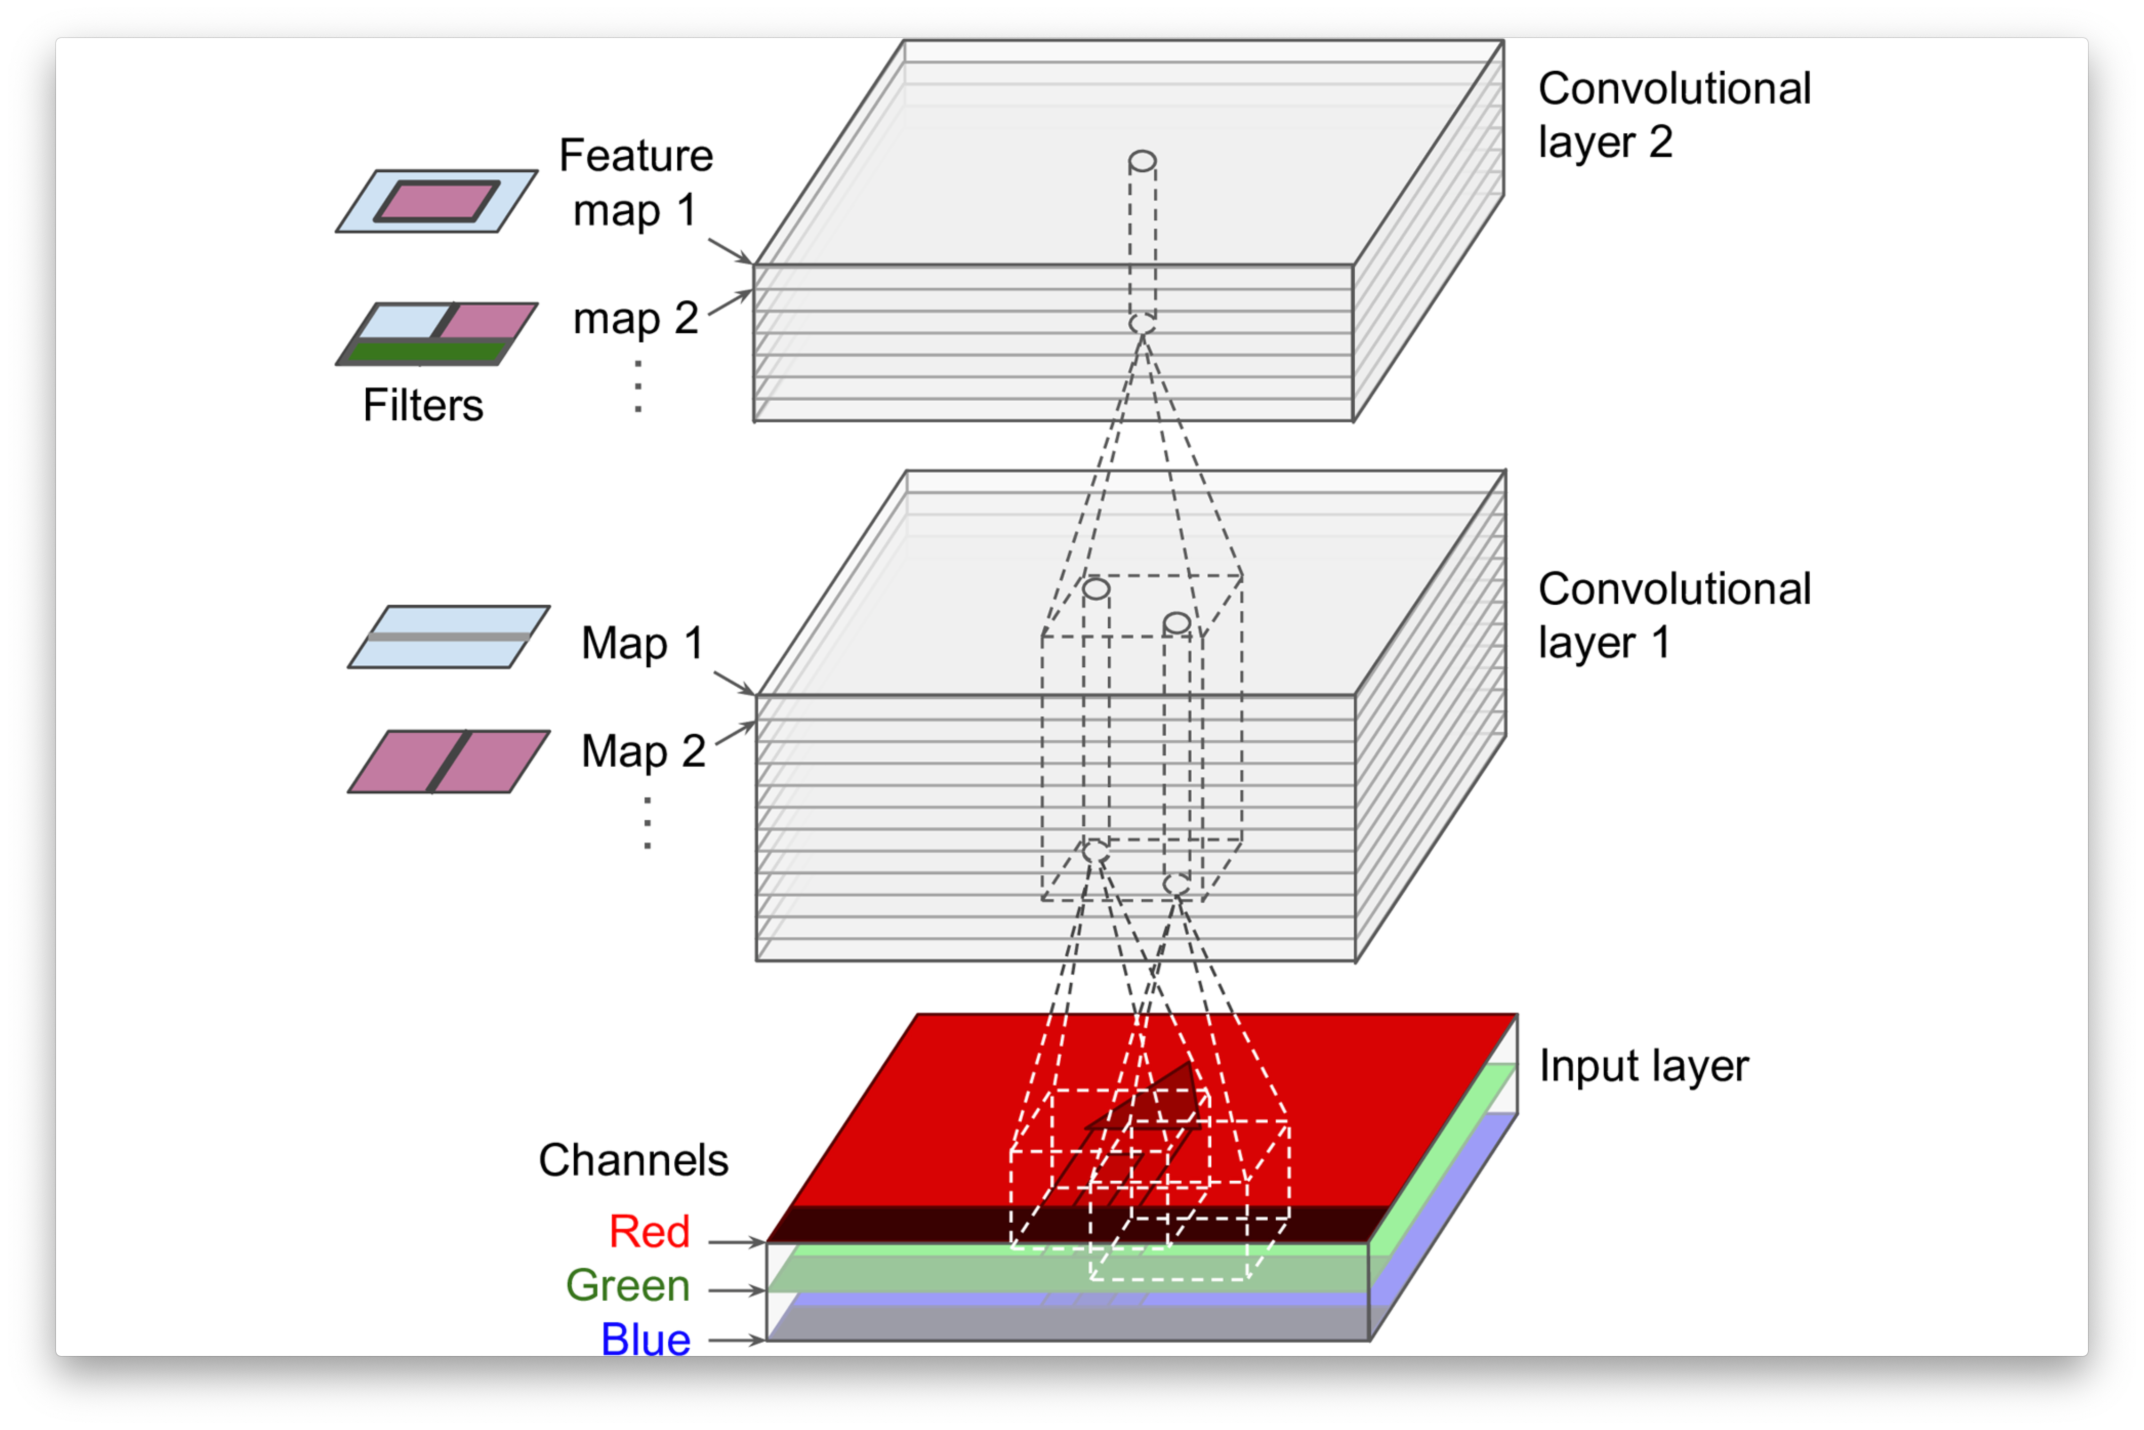

$$
z_{i,j,k} = b_k + \sum_{u=0}^{f_h-1} \sum_{v=0}^{f_w-1} \sum_{k'=0}^{f_{n'}-1} x_{i',j',k'} \cdot w_{u,v,k',k}
$$

where $i' = i \times s_h + u$ and $j' = j \times s_w + v$.

**Attribution:** Géron (2019) Figure 14.6

## Convolutional Layer

-   “Thus, a layer full of neurons using the **same filter** outputs a
    **feature map**.”

-   “Of course, you do not have to define the filters manually: instead,
    **during training the convolutional layer will automatically learn
    the most useful filters for its task**.”

Géron (2019) § 14

## Convolutional Layer

-   “(…) and **the layers above will learn to combine them into more
    complex patterns**.”

-   “The fact that **all neurons in a feature map** **share the same
    parameters** dramatically reduces the number of parameters in the
    model.”

Géron (2019) § 14

## Summmary

1.  **Feature Map:** In convolutional neural networks (CNNs), the output
    of a convolution operation is known as a feature map. It captures
    the features of the input data as processed by a specific kernel.

## Summmary

1.  **Kernel Parameters:** The parameters of the kernel are learned
    through the backpropagation process, allowing the network to
    optimize its feature extraction capabilities based on the training
    data.

## Summmary

1.  **Bias Term:** A single bias term is added uniformly to all entries
    of the feature map. This bias helps adjust the activation level,
    providing additional flexibility for the network to better fit the
    data.

## Summmary

1.  **Activation Function:** Following the addition of the bias, the
    feature map values are typically passed through an activation
    function, such as ReLU (Rectified Linear Unit). The ReLU function
    introduces non-linearity by setting negative values to zero while
    retaining positive values, enabling the network to learn more
    complex patterns.

# Pooling

## Pooling

-   A **pooling layer** exhibits similarities to a **convolutional
    layer**.

    -   Each neuron in a pooling layer is connected to a set of neurons
        within a **receptive field**.

-   However, unlike convolutional layers, pooling layers do not possess
    **weights**.

    -   Instead, they produce an output by applying an aggregating
        function, commonly **max** or **mean**.

Similar to convolutional layers, pooling layers allow specification of
the receptive field size, padding, and stride. For the `MaxPool2D`
function, the default receptive field size is $2 \times 2$.

In a pooling layer, specifically max pooling, the max function is
inherently nondifferentiable because it involves selecting the maximum
value from a set of inputs. However, in the context of backpropagation
in neural networks, we can work around this by using a concept known as
the “gradient of the max function.”

Here’s how it is done:

1.  **Forward Pass**: During the forward pass, the max pooling layer
    selects the maximum value from each pooling region (e.g., a 2x2
    window) and passes these values to the next layer.

2.  **Backward Pass**: During backpropagation, the gradient is
    propagated only to the input that was the maximum value in the
    forward pass. This means that the derivative is 1 for the position
    that held the maximum value and 0 for all other positions within the
    pooling window.

This approach effectively allows the max operation to participate in
gradient-based optimization processes like backpropagation, even though
the max function itself is nondifferentiable. By assigning the gradient
to the position of the maximum value, the network can learn which
features are most important for the task at hand.

## Pooling

-   This subsampling process leads to a **reduction in network size**;
    each window of dimensions $f_h \times f_w$ is condensed to a single
    value, typically the **maximum** or **mean** of that window.

-   According to Géron (2019), a max pooling layer provides a degree of
    **invariance to small translations** (§ 14).

## Pooling

1.  **Dimensionality Reduction:** Pooling layers reduce the spatial
    dimensions (width and height) of the input feature maps. This
    reduction decreases the number of parameters and computational load
    in the network, which can help prevent overfitting.

## Pooling

1.  **Feature Extraction:** By summarizing the presence of features in a
    region, pooling layers help retain the most critical information
    while discarding less important details. This process enables the
    network to focus on the most salient features.

## Pooling

1.  **Translation Invariance:** Pooling introduces a degree of
    invariance to translations and distortions in the input. For
    instance, max pooling captures the most prominent feature in a local
    region, making the network less sensitive to small shifts or
    variations in the input.

## Pooling

1.  **Noise Reduction:** Pooling can help smooth out noise in the input
    by aggregating information over a region, thus emphasizing
    consistent features over random variations.

## Pooling

1.  **Hierarchical Feature Learning:** By reducing the spatial
    dimensions progressively through the layers, pooling layers allow
    the network to build a hierarchical representation of the input
    data, capturing increasingly abstract and complex features at deeper
    layers.

## Keras

In [18]:
import tensorflow as tf
from functools import partial  

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal") 

model = tf.keras.Sequential([     
  DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]), 
  tf.keras.layers.MaxPool2D(),     
  DefaultConv2D(filters=128),
  DefaultConv2D(filters=128),
  tf.keras.layers.MaxPool2D(),
  DefaultConv2D(filters=256),
  DefaultConv2D(filters=256),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),     
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=64, activation="relu", kernel_initializer="he_normal"),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(units=10, activation="softmax") ])  

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type) ┃ Output Shape ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 ( Conv2D ) │ ( None , 28 , 28 , 64 ) │ 3,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 ( MaxPooling2D ) │ ( None , 14 , 14 , 64 ) │ 0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 ( Conv2D ) │ ( None , 14 , 14 , 128 ) │ 73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 ( Conv2D ) │ ( None , 14 , 14 , 128 ) │ 147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 ( MaxPooling2D ) │ ( None , 7 , 7 , 128 ) │ 0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 ( Conv2D ) │ ( None , 7 , 7 , 256 ) │ 295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 ( Conv2D ) │ ( None , 7 , 7 , 256 ) │ 590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 ( MaxPooling2D ) │ ( None , 3 , 3 , 256 ) │ 0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 ( Flatten ) │ ( None , 2304 ) │ 0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 ( Dense ) │ ( None , 128 ) │ 295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 ( Dropout ) │ ( None , 128 ) │ 0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 ( Dense ) │ ( None , 64 ) │ 8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 ( Dropout ) │ ( None , 64 ) │ 0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 ( Dense ) │ ( None , 10 ) │ 650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

Total params: 1,413,834 (5.39 MB)

Trainable params: 1,413,834 (5.39 MB)

Non-trainable params: 0 (0.00 B)

Géron (2022) Chapter 11, test accuracy of 92% on the Fashion-MNIST
dataset

The previously discussed model, which comprised fully connected (Dense)
layers, attained a test accuracy of 88%.

We will look at pooling next.

## Convolutional Neural Networks

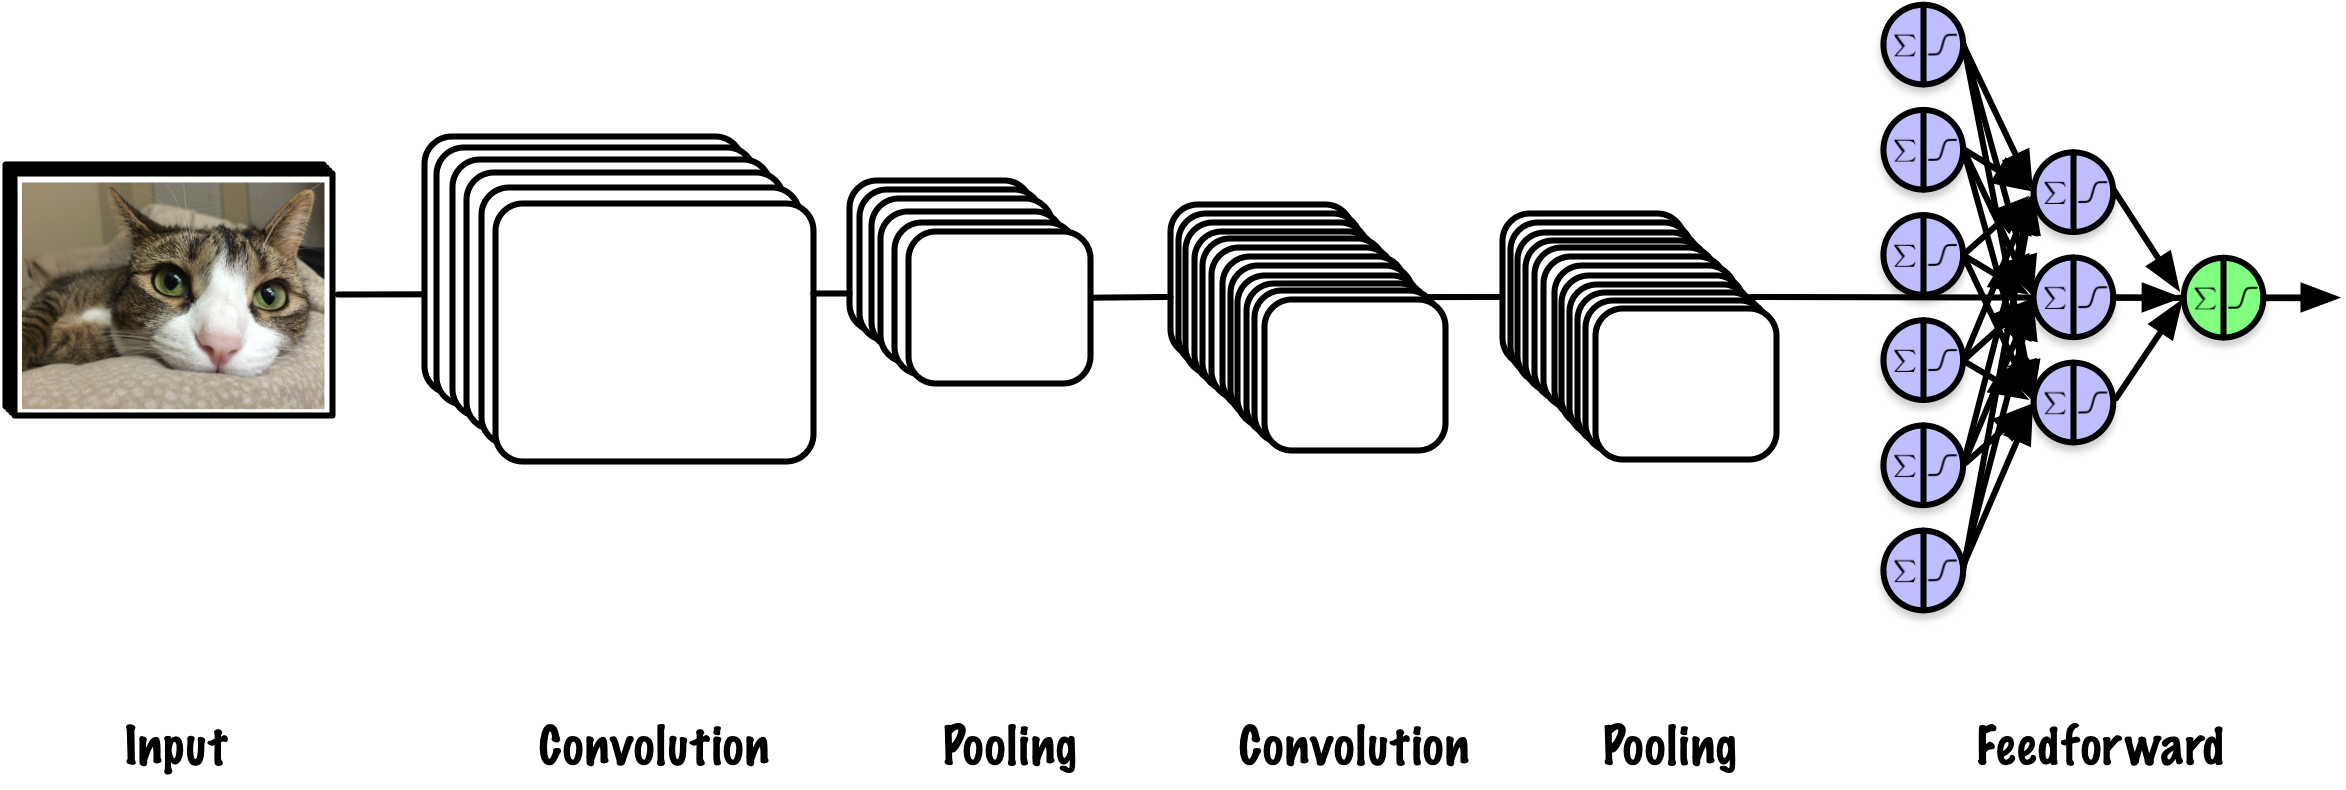

The architecture involves sequentially stacking several convolutional
layers, each followed by a ReLU activation layer, and then a pooling
layer. As this process continues, the spatial dimensions of the image
representation decrease. Concurrently, the number of feature maps
increases, as illustrated in our Keras example. At the top of this
stack, a standard feedforward neural network is incorporated.

## AlexNet



Krizhevsky, Sutskever, and Hinton (2012)

**Attribution**: Prince (2023)

AlexNet consists of eight layers with learnable parameters: five
convolutional layers followed by three fully connected layers. The
architecture also includes max-pooling layers, ReLU activation
functions, and dropout to improve training performance and reduce
overfitting.

## VGG



Simonyan and Zisserman (2015)

**Attribution**: Prince (2023)

Complementary information can be found
[here](https://www.robots.ox.ac.uk/~vgg/research/very_deep/).

> Convolutional networks (ConvNets) currently set the state of the art
> in visual recognition. The aim of this project is to investigate how
> the ConvNet depth affects their accuracy in the large-scale image
> recognition setting.

> Our main contribution is a rigorous evaluation of networks of
> increasing depth, which shows that a significant improvement on the
> prior-art configurations can be achieved by increasing the depth to
> 16-19 weight layers, which is substantially deeper than what has been
> used in the prior art. To reduce the number of parameters in such very
> deep networks, we use very small 3×3 filters in all convolutional
> layers (the convolution stride is set to 1). Please see our
> publication for more details.

## ConvNets Performance



**Attribution**: Prince (2023)

## StatQuest

<https://youtu.be/HGwBXDKFk9I>

The video presents a straightforward example that differentiates between
images of the letter O and the letter X, utilizing a single filter for
this purpose. This approach simplifies the explanation, making it easy
to follow. In practical applications, however, each convolutional layer
typically contains dozens or even hundreds of filters.

## Final Word

As you might expect, the **number of layers** and **filters** are
hyperparameters that are optimized through the process of
**hyperparameter tuning**.

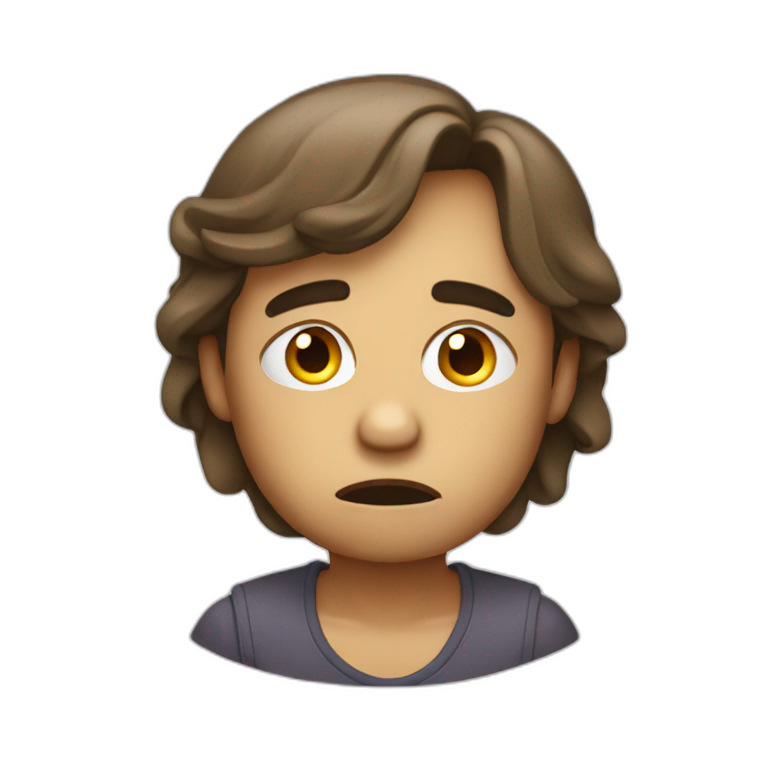

**Attribution**:
[@stefaan_cotteni](https://emojis.sh/emoji/desperate-and-discouraged-emoji-xiBgGFCW51)

# Prologue

## Summary

-   Hierarchy of Concepts in Deep Learning
-   Kernels and Convolution Operations
-   Receptive Field, Padding, and Stride
-   Filters and Feature Maps
-   Convolutional Layers
-   Pooling Layers

**Summary**

-   **Hierarchy of Concepts in Deep Learning**
    -   Deep learning models represent data through layers of increasing
        abstraction.
    -   Each layer learns patterns based on the outputs of preceding
        layers (“patterns of patterns”).
    -   This hierarchical learning reduces reliance on manual feature
        engineering.
    -   Deep networks achieve better performance with fewer parameters
        compared to shallow networks.
-   **Convolutional Neural Networks (CNNs)**
    -   CNNs specialize in processing data with a grid-like topology
        (e.g., images).
    -   They detect local patterns using convolutional layers with
        shared weights.
    -   Neurons in convolutional layers connect only within their
        receptive fields, not fully connected.
    -   This local connectivity and weight sharing significantly reduce
        the number of parameters.
-   **Kernels and Convolution Operations**
    -   Kernels (filters) are small matrices that slide over the input
        data to perform convolutions.
    -   The convolution operation involves element-wise multiplication
        and summation.
    -   Kernels can be designed to detect specific features like edges
        and textures.
    -   Feature maps are generated, highlighting where certain features
        are detected in the input.
-   **Receptive Field, Padding, and Stride**
    -   **Receptive Field**: The local region of the input that a neuron
        is sensitive to.
    -   **Padding**: Adding zeros around the input to maintain spatial
        dimensions after convolution.
    -   **Stride**: The step size with which the kernel moves over the
        input data.
    -   These parameters control the output size and computation in
        convolutional layers.
-   **Filters and Feature Maps**
    -   Filters are learned during training and are crucial for feature
        detection.
    -   All neurons in a feature map share the same filter parameters.
    -   This sharing leads to efficient parameter usage and consistent
        feature detection across the input.
-   **Convolutional Layers**
    -   Perform convolutions followed by adding a bias term and applying
        an activation function (e.g., ReLU).
    -   The activation function introduces non-linearity, allowing the
        network to learn complex patterns.
    -   The use of shared weights and biases reduces the total number of
        parameters.
-   **Pooling Layers**
    -   **Purpose**: Reduce the spatial dimensions of feature maps to
        control overfitting and computation.
    -   **Types**:
        -   **Max Pooling**: Takes the maximum value within a pooling
            window.
        -   **Average Pooling**: Computes the average value within a
            pooling window.
    -   **Benefits**:
        -   Dimensionality reduction leads to fewer parameters and
            faster computation.
        -   Introduces translation invariance, making the network robust
            to shifts and distortions.
        -   Helps in hierarchical feature learning by focusing on
            prominent features.
-   **Building CNN Architectures**
    -   CNNs are built by stacking convolutional and pooling layers.
    -   Spatial dimensions decrease while the number of feature maps
        increases in deeper layers.
    -   Often culminates with fully connected layers for classification
        tasks.
    -   Example architectures can be implemented using frameworks like
        Keras.
-   **Hyperparameter Tuning**
    -   Key hyperparameters include the number of layers, filters,
        kernel sizes, strides, and padding.
    -   Proper tuning is essential for achieving optimal model
        performance.
    -   Overfitting can be controlled using techniques like dropout and
        regularization.
-   **Future Directions**
    -   **Feature Attribution**:
        -   Techniques like saliency maps and activation maximization
            help interpret model decisions.
        -   Essential for applications requiring explainability (e.g.,
            self-driving cars).
    -   **Transfer Learning**:
        -   Involves using pre-trained models on new tasks to save time
            and resources.
        -   Particularly useful when labeled data is scarce.

## Future Directions

When integrating CNNs into your projects, consider exploring the
following topics:

-   **Feature Attribution:** Various techniques are available to
    visualize what the network has learned. For example, in the context
    of self-driving cars, it is crucial to ensure that the network
    focuses on relevant features, avoiding distractions.

-   **Transfer Learning:** This approach enables the reuse of weights
    from pre-trained networks, which accelerates the learning process,
    reduces computational demands, and facilitates network training even
    with a limited number of examples.

There are also 1D convolutions, which are often applied in
bioinformatics.

## Further Reading

![](https://mit-press-us.imgix.net/covers/9780262048644.jpg?auto=format&w=298&dpr=2&q=80)

-   [Understanding Deep Learning](http://udlbook.com) (Prince 2023) is a
    recently published textbook focused on the foundational concepts of
    deep learning.

-   It begins with fundamental principles and extends to contemporary
    topics such as transformers, diffusion models, graph neural
    networks, autoencoders, adversarial networks, and reinforcement
    learning.

-   The textbook aims to help readers comprehend these concepts without
    delving excessively into theoretical details.

-   It includes sixty-eight Python notebook exercises.

-   The book follows a “read-first, pay-later” model.

## Resources

-   **A guide to convolution arithmetic for deep learning**
-   Authors: Vincent Dumoulin and Francesco Visin
-   Last revised: 11 Jan 2018
    -   [arXiv:1603.07285](https://arxiv.org/abs/1603.07285)
    -   [GitHub
        Repository](https://github.com/vdumoulin/conv_arithmetic/)

## Next lecture

-   We will introduce solution spaces.

## References

Géron, Aurélien. 2019. *Hands-on Machine Learning with Scikit-Learn,
Keras, and TensorFlow*. 2nd ed. O’Reilly Media.

———. 2022. *Hands-on Machine Learning with Scikit-Learn, Keras, and
TensorFlow*. 3rd ed. O’Reilly Media, Inc.

Goodfellow, Ian, Yoshua Bengio, and Aaron Courville. 2016. *Deep
Learning*. Adaptive Computation and Machine Learning. MIT Press.
<https://dblp.org/rec/books/daglib/0040158>.

Krizhevsky, Alex, Ilya Sutskever, and Geoffrey E Hinton. 2012. “ImageNet
Classification with Deep Convolutional Neural Networks.” In *Advances in
Neural Information Processing Systems*, edited by F. Pereira, C. J.
Burges, L. Bottou, and K. Q. Weinberger. Vol. 25. Curran Associates,
Inc.
<https://proceedings.neurips.cc/paper_files/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf>.

LeCun, Yann, Yoshua Bengio, and Geoffrey Hinton. 2015. “Deep Learning.”
*Nature* 521 (7553): 436–44. <https://doi.org/10.1038/nature14539>.

Lecun, Y., L. Bottou, Y. Bengio, and P. Haffner. 1998. “Gradient-Based
Learning Applied to Document Recognition.” *Proceedings of the IEEE* 86
(11): 2278–2324. <https://doi.org/10.1109/5.726791>.

Prince, Simon J. D. 2023. *Understanding Deep Learning*. The MIT Press.
<http://udlbook.com>.

Russell, Stuart, and Peter Norvig. 2020. *Artificial Intelligence: A
Modern Approach*. 4th ed. Pearson. <http://aima.cs.berkeley.edu/>.

Simonyan, Karen, and Andrew Zisserman. 2015. “Very Deep Convolutional
Networks for Large-Scale Image Recognition.” In *International
Conference on Learning Representations*.

------------------------------------------------------------------------

Marcel **Turcotte**

<Marcel.Turcotte@uOttawa.ca>

School of Electrical Engineering and **Computer Science** (EE**CS**)

University of Ottawa